- This notebook implements linear regression from scratch using NumPy, on a dataset with a single feature - TotalHours

- We use the Zuu Crew dataset, focusing only on students who completed the *Foundations of ML* course.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load and filter dataset
df = pd.read_csv('zuu crew scores.csv')
df = df[df['CourseName'] == 'Foundations of ML']
df.head(5)

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [3]:
X = df['TotalHours'].values.reshape(-1, 1)
y = df['CapstoneScore'].values

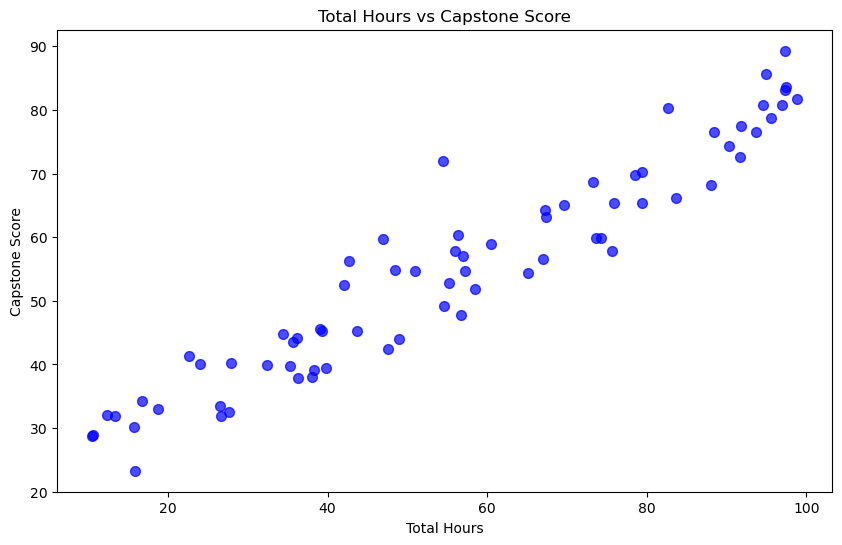

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.7, color='blue', s=50)
plt.xlabel('Total Hours')
plt.ylabel('Capstone Score')
plt.title('Total Hours vs Capstone Score')
plt.show()

- Linear Regression

    - m = number of samples
    - yᵢ = actual lable
    - ŷᵢ = predicted lable

- Hypothesis: ŷ = β₀ + β₁x

- Cost Function:   J = (1/2m) Σ(ŷᵢ - yᵢ)²

- Gradients 

    - ∂J/∂β₀ = (1/m) Σ(ŷᵢ - yᵢ)
    - ∂J/∂β₁ = (1/m) Σ(ŷᵢ - yᵢ)xᵢ

- Update: β := β - α∇J

In [5]:
def compute_cost(X, y, beta_0, beta_1):
    m = len(y)
    y_hat = beta_0 + beta_1 * X
    cost = (1/(2*m)) * np.sum((y_hat - y) ** 2)
    return cost

def compute_gradients(X, y, beta_0, beta_1):
    m = len(y)
    y_hat = beta_0 + beta_1 * X
    d_beta_0 = (1/m) * np.sum(y_hat - y)
    d_beta_1 = (1/m) * np.sum((y_hat - y) * X)
    return d_beta_0, d_beta_1

def gradient_descent(X, y, learning_rate, num_iter=10000):
    beta_0 = np.random.randn()
    beta_1 = np.random.randn()
    cost_history = []

    for i in range(num_iter):
        d_beta_0, d_beta_1 = compute_gradients(X, y, beta_0, beta_1)
        beta_0 -= learning_rate * d_beta_0
        beta_1 -= learning_rate * d_beta_1

        cost = compute_cost(X, y, beta_0, beta_1)
        cost_history.append(cost)

        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return beta_0, beta_1, cost_history

In [6]:
def predict(X, beta_0, beta_1):
    return beta_0 + beta_1 * X
    

Learning Rate Analysis

- α = 0.00001
- α = 0.001
- α = 0.1
- α = 1.0


In [7]:
alphas = [0.00001, 0.001, 0.1, 1.0]
results = {}

for alpha in alphas:
    print(f"Training with α = {alpha}")
    b0, b1, costs = gradient_descent(X, y, learning_rate=alpha)
    results[alpha] = {
        "beta_0": b0,
        "beta_1": b1,
        "cost_history": costs
    }
    print()

Training with α = 1e-05
Iteration 0: Cost = 100318.7763
Iteration 1000: Cost = inf
Iteration 2000: Cost = nan


c:\Users\User\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\User\AppData\Local\Temp\ipykernel_37488\1379631639.py:4: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((y_hat - y) ** 2)
C:\Users\User\AppData\Local\Temp\ipykernel_37488\1379631639.py:22: RuntimeWarning: invalid value encountered in scalar subtract
  beta_1 -= learning_rate * d_beta_1


Iteration 3000: Cost = nan
Iteration 4000: Cost = nan
Iteration 5000: Cost = nan
Iteration 6000: Cost = nan
Iteration 7000: Cost = nan
Iteration 8000: Cost = nan
Iteration 9000: Cost = nan

Training with α = 0.001
Iteration 0: Cost = 12109846457.6636
Iteration 1000: Cost = nan
Iteration 2000: Cost = nan
Iteration 3000: Cost = nan
Iteration 4000: Cost = nan
Iteration 5000: Cost = nan
Iteration 6000: Cost = nan
Iteration 7000: Cost = nan
Iteration 8000: Cost = nan
Iteration 9000: Cost = nan

Training with α = 0.1
Iteration 0: Cost = 265081714958616.3125
Iteration 1000: Cost = nan
Iteration 2000: Cost = nan
Iteration 3000: Cost = nan
Iteration 4000: Cost = nan
Iteration 5000: Cost = nan
Iteration 6000: Cost = nan
Iteration 7000: Cost = nan
Iteration 8000: Cost = nan
Iteration 9000: Cost = nan

Training with α = 1.0
Iteration 0: Cost = 2803435019209282.0000
Iteration 1000: Cost = nan


C:\Users\User\AppData\Local\Temp\ipykernel_37488\1379631639.py:11: RuntimeWarning: overflow encountered in multiply
  d_beta_1 = (1/m) * np.sum((y_hat - y) * X)
C:\Users\User\AppData\Local\Temp\ipykernel_37488\1379631639.py:21: RuntimeWarning: invalid value encountered in scalar subtract
  beta_0 -= learning_rate * d_beta_0


Iteration 2000: Cost = nan
Iteration 3000: Cost = nan
Iteration 4000: Cost = nan
Iteration 5000: Cost = nan
Iteration 6000: Cost = nan
Iteration 7000: Cost = nan
Iteration 8000: Cost = nan
Iteration 9000: Cost = nan



Convergence Plot

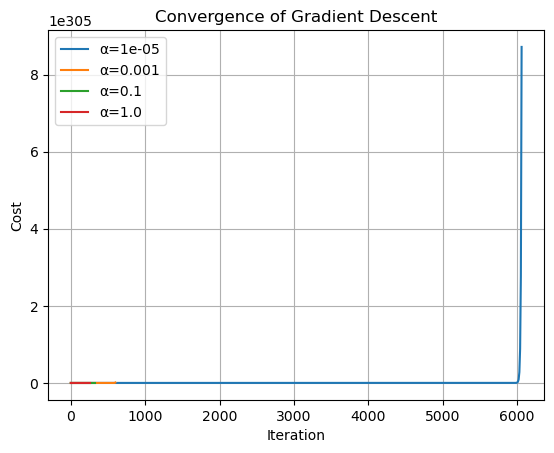

In [8]:
for alpha in alphas:
    plt.plot(np.arange(len(results[alpha]['cost_history'])) * 10, results[alpha]['cost_history'], label=f"α={alpha}")

plt.title("Convergence of Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

Regression Evaluation Metrics

In [9]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot


Model Evaluation

In [10]:
for alpha in alphas:
    b0 = results[alpha]["beta_0"]
    b1 = results[alpha]["beta_1"]
    y_pred = predict(X, b0, b1)
    print(f"α = {alpha}")
    print(f"  MSE  = {mse(y, y_pred):.4f}")
    print(f"  MAE  = {mae(y, y_pred):.4f}")
    print(f"  RMSE = {rmse(y, y_pred):.4f}")
    print(f"  R²   = {r2(y, y_pred):.4f}")
    print()


α = 1e-05
  MSE  = nan
  MAE  = nan
  RMSE = nan
  R²   = nan

α = 0.001
  MSE  = nan
  MAE  = nan
  RMSE = nan
  R²   = nan

α = 0.1
  MSE  = nan
  MAE  = nan
  RMSE = nan
  R²   = nan

α = 1.0
  MSE  = nan
  MAE  = nan
  RMSE = nan
  R²   = nan

